In [ ]:
# https://nhrdf.org/en-us/DailyWiseMarketArrivals

In [ ]:
import pandas as pd

In [ ]:
# web scraping of html data into python

df = pd.read_html("/content/DailyWiseMarketArrivals.html")[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2004,BANGALORE,6340,1000,1100,1050
1,02/Jan/2004,BANGALORE,499,440,540,490
2,03/Jan/2004,BANGALORE,9957,1000,1100,1050
3,05/Jan/2004,BANGALORE,11937,1000,1100,1050
4,06/Jan/2004,BANGALORE,9613,1000,1100,1050
...,...,...,...,...,...,...
4555,28/Mar/2022,BANGALORE,20332,1000,1600,1300
4556,30/Mar/2022,BANGALORE,10750,1000,1600,1500
4557,31/Mar/2022,BANGALORE,11600,1000,1600,1300
4558,02/Apr/2022,BANGALORE,29423,1500,2600,2050


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
len(df)

4560

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4559 non-null   object
 1   Market                4560 non-null   object
 2   Arrival(q)            4560 non-null   int64 
 3   Price Minimum (Rs/q)  4560 non-null   object
 4   Price Maximum (Rs/q)  4560 non-null   object
 5   Modal Price (Rs/q)    4560 non-null   object
dtypes: int64(1), object(5)
memory usage: 213.9+ KB


In [ ]:
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
df.tail()

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
4555,28/Mar/2022,BANGALORE,20332,1000,1600,1300
4556,30/Mar/2022,BANGALORE,10750,1000,1600,1500
4557,31/Mar/2022,BANGALORE,11600,1000,1600,1300
4558,02/Apr/2022,BANGALORE,29423,1500,2600,2050
4559,NaN,Total,105298675,728(Avg),1528(Avg),1208(Avg)


In [ ]:
df = df.dropna() # drop the entire row
# df = df.fillna(1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 0 to 4558
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4559 non-null   object
 1   Market                4559 non-null   object
 2   Arrival(q)            4559 non-null   int64 
 3   Price Minimum (Rs/q)  4559 non-null   object
 4   Price Maximum (Rs/q)  4559 non-null   object
 5   Modal Price (Rs/q)    4559 non-null   object
dtypes: int64(1), object(5)
memory usage: 249.3+ KB


In [ ]:
#to save a dataframe as a csv file
# df.to_csv('Forecast_data.csv')

In [ ]:
# conditions for forecasting

# dataframe should have only 2 columns  (slicing of data)
# date column - always should be named as ds (DATATYPE - datetime64)
# price/sales column (output column) - always should be named as y (DATATYPE - int64 or float64)

In [ ]:
df_new = df[['Date','Modal Price (Rs/q)']]
df_new

,Date,Modal Price (Rs/q)
0,01/Jan/2004,1050
1,02/Jan/2004,490
2,03/Jan/2004,1050
3,05/Jan/2004,1050
4,06/Jan/2004,1050
...,...,...
4554,25/Mar/2022,1400
4555,28/Mar/2022,1300
4556,30/Mar/2022,1500
4557,31/Mar/2022,1300


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 0 to 4558
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                4559 non-null   object
 1   Modal Price (Rs/q)  4559 non-null   object
dtypes: object(2)
memory usage: 106.9+ KB


In [ ]:
df_new.rename(columns = {'Date':'ds','Modal Price (Rs/q)':'y'},inplace = True)
df_new

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y
0,01/Jan/2004,1050
1,02/Jan/2004,490
2,03/Jan/2004,1050
3,05/Jan/2004,1050
4,06/Jan/2004,1050
...,...,...
4554,25/Mar/2022,1400
4555,28/Mar/2022,1300
4556,30/Mar/2022,1500
4557,31/Mar/2022,1300


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 0 to 4558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4559 non-null   object
 1   y       4559 non-null   object
dtypes: object(2)
memory usage: 106.9+ KB


In [ ]:
#change datatypes to the required format
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 0 to 4558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4559 non-null   datetime64[ns]
 1   y       4559 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 106.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


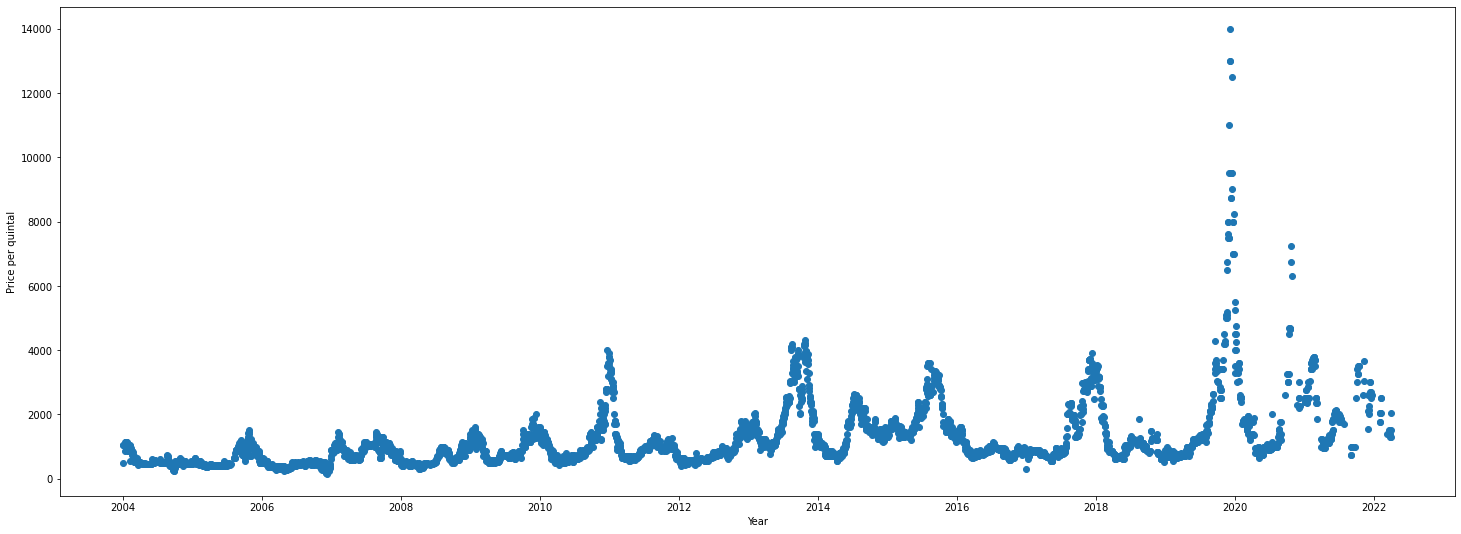

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,9))
plt.scatter(df_new['ds'],df_new['y'])
plt.xlabel("Year")
plt.ylabel("Price per quintal")
plt.show()

In [ ]:
# outliers - remove them and replace with Null values

In [ ]:
import numpy as np
df_new['y'] = np.where(df_new['y']>5000,np.nan, df_new['y'])
df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2004-01-01,1050.0
1,2004-01-02,490.0
2,2004-01-03,1050.0
3,2004-01-05,1050.0
4,2004-01-06,1050.0
...,...,...
4554,2022-03-25,1400.0
4555,2022-03-28,1300.0
4556,2022-03-30,1500.0
4557,2022-03-31,1300.0


In [ ]:
df_new.isnull().sum()

ds     0
y     34
dtype: int64

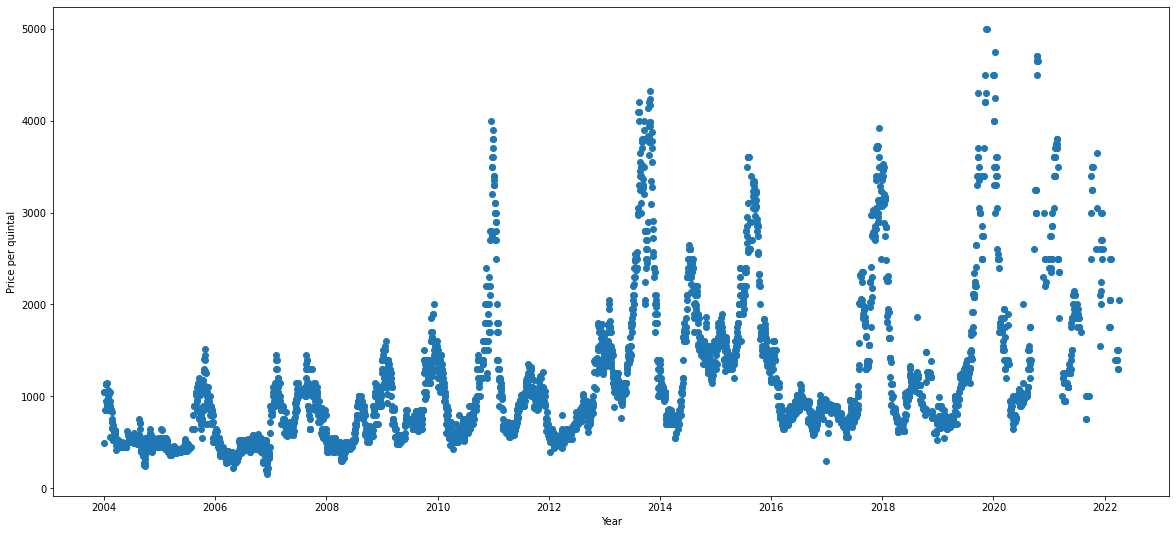

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.scatter(df_new['ds'],df_new['y'])
plt.xlabel("Year")
plt.ylabel("Price per quintal")
plt.show()

In [ ]:
# Forecasting (FBProphet)
# FbProphet is a powerful time series analysis package released by Core Data Science Team at Facebook.
# It is simple and easy to go package for performing time series analytics and forecasting at scale.

In [ ]:
pip install fbprophet

In [ ]:
import fbprophet
op = fbprophet.Prophet(changepoint_prior_scale=1)   #call the algorithm
#changepoint_prior_scale makes the model more robust and graph fits in more nicely
op.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = op.make_future_dataframe(periods = 300, freq = 'D',include_history=True)
forecast = op.predict(forecast)

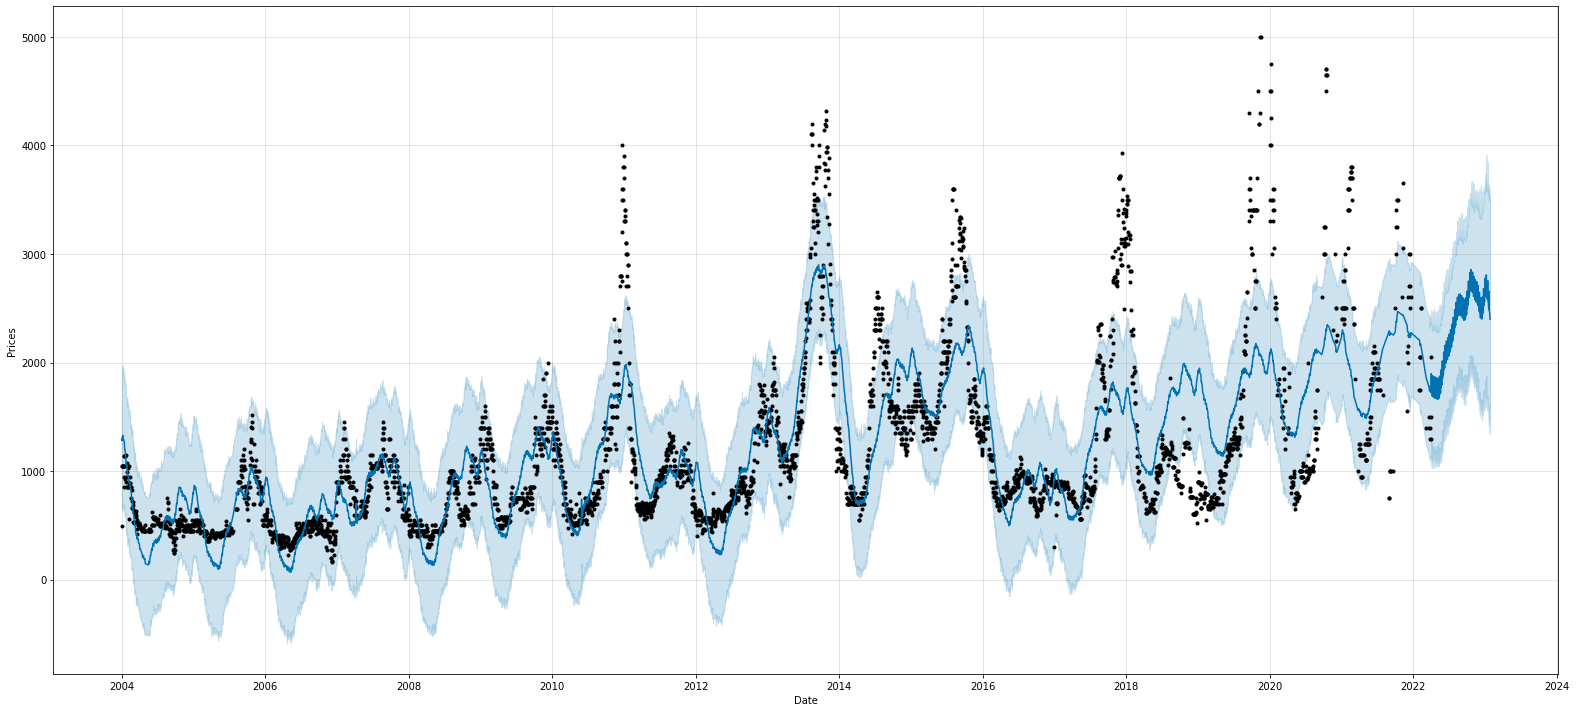

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel = 'Prices',figsize = (22,10))
plt.show()

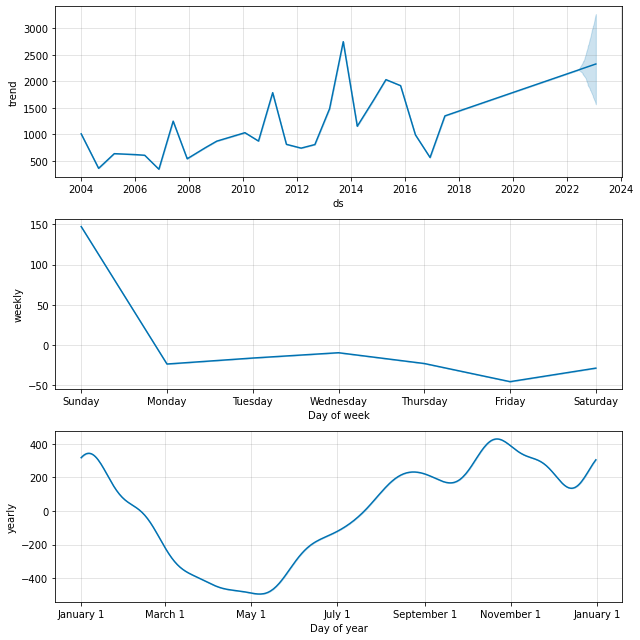

In [ ]:
op.plot_components(forecast)
plt.show()